In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils
import heapq

settings_path = "./settings.json"
jobs = pd.read_csv("./jobs.csv")
settings = utils.read_settings_from_file(settings_path)
jobs = utils.clean_up(jobs, settings)
jobs = utils.filter_vacancies_accroding_skills_occurences(jobs, settings)

In [2]:
def get_coverage(skill, jobs, return_idx:bool = False) -> str:
    counter = 0
    idx = []
    for i in range(len(jobs)):
        for name in skill:
            if utils.check_skill_in_vacancies(name, str(jobs.loc[i, "description"]), str(jobs.loc[i, "skills"])): 
                counter += 1
                idx.append(i)
                break
    if return_idx:
        return counter/len(jobs), idx
    return counter/len(jobs)

skill = ["python"]
get_coverage(skill, jobs)

0.5306513409961686

In [3]:
def get_multi_coverage(skills, jobs):
    collection = dict()
    for skill in skills: 
        entry = {skill[0]:get_coverage(skill, jobs)}
        if list(entry.values())[0] == 0: # ignoring if no occurencies
            continue
        collection.update(entry)

    collection = dict(sorted(collection.items(), key=lambda item: item[1], reverse=True))
    collection = heapq.nlargest(15, collection.items(), key=lambda i: i[1])
    collection = {key:value for key, value in collection}
    fig, ax = plt.subplots()
    bar_container = ax.bar(collection.keys(), collection.values())
    ax.set(ylabel='Coverage', title='Skills coverage', ylim=(0, 1))
    ax.bar_label(bar_container, fmt=lambda x: f'{x * 100:.2f}%', rotation=75)
    plt.xticks(rotation=75)
    plt.savefig("barchart")
    return collection

{'python': 0.5306513409961686,
 'r': 0.3831417624521073,
 'mysql': 0.23371647509578544,
 'azure': 0.18199233716475097,
 'aws': 0.16666666666666666,
 'java': 0.12452107279693486,
 'gcp': 0.11877394636015326,
 'torch': 0.10727969348659004,
 'tf': 0.08620689655172414,
 'matlab': 0.08237547892720307,
 'js': 0.07471264367816093,
 'c#': 0.07471264367816093,
 'kubernetes': 0.07279693486590039,
 'cpp': 0.07088122605363985,
 'sklearn': 0.06513409961685823}

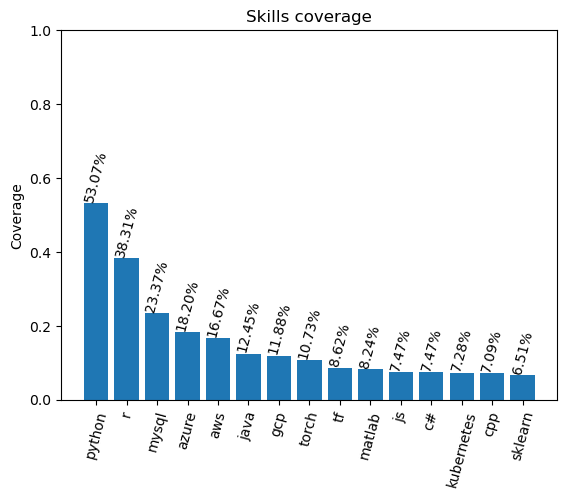

In [4]:
skills = settings["skills"]
get_multi_coverage(skills, jobs)